# Project description

You work as a video ad analyst at the Sterling & Draper advertising agency. You devote a lot of time to analyzing trending videos on YouTube to determine what content deserves marketing attention.
Each video has a specific category (Entertainment, Music, News & Politics, etc.), region, and trending date.
A video can be in the trending section for several days in a row.
Now you decided that it's high time the process were automated. You're going to make a dashboard.

After talking to the managers and database administrators, you've drawn up brief technical requirements:


- **Business goal:** analyze trending-video history on YouTube
- **How often the dashboard will be used:** at least once a day
- **Target dashboard user:** video ads planning managers
- **Parameters according to which the data is to be grouped:**
    - Trending date and time (don't forget that likes and dislikes must be calculated as of the last trending day of the video)
    - Video category
    - Region
- **Importance:** the trending-video history graph is the most important, so it should take up at least half of the dashboard
- **Data sources for the dashboard:** raw data on trending (the trending_vids table)
- **Database storing aggregate data:** additional aggregate tables in the youtube database
- **Data update interval:** once every 24 hours, at midnight UTC;
- **Graphs to be displayed and their order, dashboard controls to be included: as shown in the draft:**



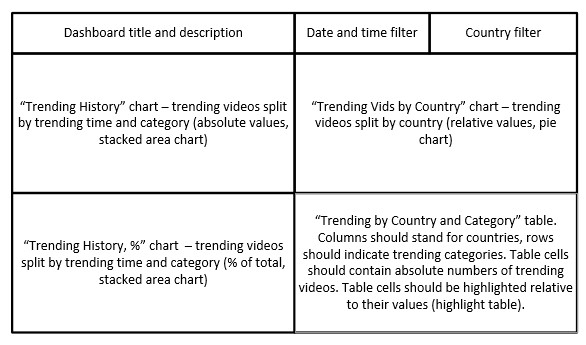

# Data description

- **record_id** - Video identifier
- **region** - Region
- **category_title** - Category name
- **trending_date** - Trending date
- **videos_count** - Number of videos


------------

To create the dashboard we need to download the data, do the preprocessing if needed and save the file:

In [1]:
!pip install psycopg2

# import libraries
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',         # user name
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-youtube-data'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], db_config['pwd'], db_config['host'], db_config['port'], db_config['db'])

engine = create_engine(connection_string) 


# SQL query
query = '''SELECT * FROM trending_by_time'''

trending_by_time = pd.io.sql.read_sql(query, con = engine, index_col = 'record_id')

In [2]:
trending_by_time.head()

,region,trending_date,category_title,videos_count
record_id,,,,
1,France,2017-11-14,Autos & Vehicles,8
2,France,2017-11-15,Autos & Vehicles,2
3,France,2017-11-16,Autos & Vehicles,6
4,France,2017-11-17,Autos & Vehicles,8
5,France,2017-11-18,Autos & Vehicles,4


To be sure that the data is fine let's do some preprocessing:

In [3]:
trending_by_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 1 to 12343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          12343 non-null  object        
 1   trending_date   12343 non-null  datetime64[ns]
 2   category_title  12343 non-null  object        
 3   videos_count    12343 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 482.1+ KB


No NaN. It's good

In [4]:
trending_by_time['region'].value_counts()

Russia           2930
United States    2860
France           2774
India            2283
Japan            1496
Name: region, dtype: int64

There aren't any strange things in there, mooving on

In [5]:
trending_by_time['category_title'].value_counts()

People & Blogs           942
Entertainment            942
Comedy                   940
News & Politics          939
Music                    938
Film & Animation         938
Howto & Style            937
Sports                   933
Science & Technology     881
Education                863
Gaming                   767
Autos & Vehicles         681
Pets & Animals           674
Travel & Events          489
Shows                    406
Nonprofits & Activism     49
Movies                    22
Trailers                   2
Name: category_title, dtype: int64

Looks fine. Continue checking:

In [6]:
trending_by_time['videos_count'].describe()

count    12343.000000
mean        27.545167
std         29.793491
min          2.000000
25%          8.000000
50%         18.000000
75%         36.000000
max        220.000000
Name: videos_count, dtype: float64

We see that the value of 75% is still pretty small so we will leave it as it is. It's time to look at the period of data taken:

In [7]:
trending_by_time['trending_date'].min()

Timestamp('2017-11-14 00:00:00')

In [8]:
trending_by_time['trending_date'].max()

Timestamp('2018-06-14 00:00:00')

7 months. So now let's check it all for duplicates:

In [9]:
trending_by_time.drop_duplicates(subset=['region', 'trending_date', 'category_title'])
trending_by_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 1 to 12343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          12343 non-null  object        
 1   trending_date   12343 non-null  datetime64[ns]
 2   category_title  12343 non-null  object        
 3   videos_count    12343 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 482.1+ KB


Nothing changed. Here we can end the preprocessing and save the file:

In [10]:
trending_by_time.to_csv('trending_by_time.csv', index = False)

Now we can create the equirements file:

In [11]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
